In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv('Credit_Card_Applications.csv')

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)
print(X)


In [ ]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)

In [ ]:
som.train_random(data=X,num_iteration=100)

In [ ]:
from pylab import bone,pcolor,colorbar,plot,show

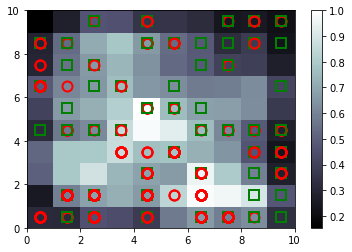

In [20]:
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [21]:
mappings=som.win_map(X)
frauds=np.concatenate((mappings[5,5],mappings[(6,1)]),axis=0)
frauds=sc.inverse_transform(frauds)
print(frauds)


[[1.5796813e+07 1.0000000e+00 4.1580000e+01 1.7500000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 2.1000000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5753591e+07 1.0000000e+00 2.6750000e+01 1.1250000e+00 2.0000000e+00
  1.4000000e+01 8.0000000e+00 1.2500000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 5.2990000e+03]
 [1.5797246e+07 1.0000000e+00 2.3420000e+01 5.8500000e-01 2.0000000e+00
  8.0000000e+00 8.0000000e+00 8.5000000e-02 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.8000000e+02 1.0000000e+00]
 [1.5715519e+07 1.0000000e+00 2.9920000e+01 1.8350000e+00 2.0000000e+00
  8.0000000e+00 8.0000000e+00 4.3350000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.6000000e+02 2.0100000e+02]
 [1.5812766e+07 1.0000000e+00 2.1500000e+01 9.7500000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 2.5000000e-01 1.0000000e+00 0.